<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Data_project/blob/main/cifar_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10

In [ ]:
cifar10 = keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=64)

results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
625/625 [==============================] - 139s 221ms/step - loss: 1.9373 - accuracy: 0.2825 - val_loss: 1.5586 - val_accuracy: 0.4485
Epoch 2/20
625/625 [==============================] - 138s 221ms/step - loss: 1.5687 - accuracy: 0.4471 - val_loss: 1.3449 - val_accuracy: 0.5305
Epoch 3/20
625/625 [==============================] - 138s 221ms/step - loss: 1.4065 - accuracy: 0.5126 - val_loss: 1.2465 - val_accuracy: 0.5737
Epoch 4/20
625/625 [==============================] - 146s 234ms/step - loss: 1.3004 - accuracy: 0.5574 - val_loss: 1.0840 - val_accuracy: 0.6330
Epoch 5/20
625/625 [==============================] - 140s 224ms/step - loss: 1.2123 - accuracy: 0.5938 - val_loss: 1.0467 - val_accuracy: 0.6442
Epoch 6/20
625/625 [==============================] - 140s 224ms/step - loss: 1.1576 - accuracy: 0.6174 - val_loss: 0.9709 - val_accuracy: 0.6733
Epoch 7/20
625/625 [==============================] - 139s 223ms/step - loss: 1.1027 - accuracy: 0.6355 - val_loss: 0.9635 -

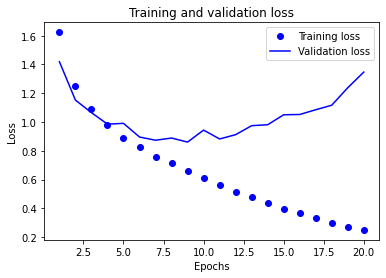

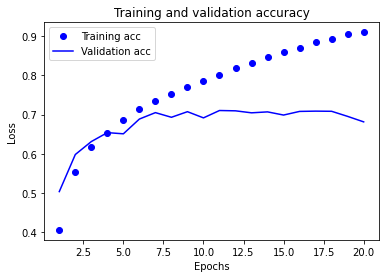

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

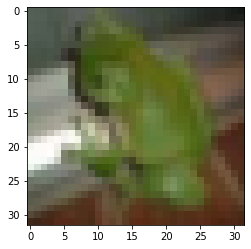

In [ ]:
plt.imshow(x_test[7])

In [ ]:
import cv2

labels =["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

res_img = cv2.resize(x_test[7],(32,32))
res_img = np.expand_dims(res_img, axis = 0)

predictions = model.predict(res_img)
n = np.argmax(predictions)
print("Output label:", n)
print(labels[n])

Output label: 6
frog
